# 1. Apply a multiple linear regression on the given dataset

## Variable list
- M: percentage of males aged 14-24
- So: whether it is in a Southern state. 1 for Yes, 0 for No.
- Ed: mean years of schooling
- Po1: police expenditure in 1960
- Po2: police expenditure in 1959
- LF: labour force participation rate
- M.F: number of males per 1000 females
- Pop: state population
- NW: number of non-whites resident per 1000 people
- U1: unemployment rate of urban males aged 14-24
- U2: unemployment rate of urban males aged 35-39
- GDP: gross domestic product per head
- Ineq: income inequality
- Prob: probability of imprisonment
- Time: average time served in prisons
- y: crime rate in an unspecified unit region (target)

In [55]:
# packages and data import
# DO NOT CHANGE THIS PART
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import t, f, chi2, skew, kurtosis
%matplotlib inline
data=pd.read_csv('https://drive.google.com/uc?export=download&id=1ssBNxmds4zmmJbAHzJUB0_UyyfyMtoHT')

(1) Find the top 5 input variables that show the high linear correlation with the target based on the correlation coefficient. 

In [56]:
data.corr()['y']

M      -0.089472
So     -0.090637
Ed      0.322835
Po1     0.687604
Po2     0.666714
LF      0.188866
M.F     0.213914
Pop     0.337474
NW      0.032599
U1     -0.050478
U2      0.177321
GDP     0.441320
Ineq   -0.179024
Prob   -0.427422
Time    0.149866
y       1.000000
Name: y, dtype: float64

(2) Draw pairwise scatter plot – one scatter plot illustrates the relationship between the input variable selected in Question (1) and output target 

Text(0, 0.5, 'target(y)')

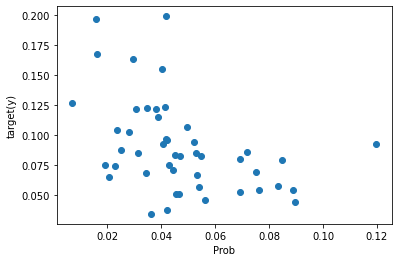

In [57]:
plt.scatter(data['Prob'],data['y'])
plt.xlabel('Prob')
plt.ylabel(('target(y)'))

(3) Train a linear regression model (M1) using the selected variables in Question (1) and fill the following table. 

In [69]:
X=data[['Po1','Po2','Pop','GDP','Prob']].values
n,p=X.shape
np.ones(n)
X=np.c_[np.ones(n), X]
XtX = np.matmul(X.T,X)
inv_XtX=np.linalg.inv(XtX)
beta = np.matmul(np.matmul(inv_XtX, X.T),data[['y']].values).flatten()

y_pred = np.matmul(X, beta)
y_true = data['y'].values
SSE=np.sum((y_true-y_pred)**2)
MSE = SSE/(n-p-1)

se2_beta = MSE*inv_XtX

t0=beta[0]/np.sqrt(se2_beta[0,0])
t1=beta[1]/np.sqrt(se2_beta[1,1])
t2=beta[2]/np.sqrt(se2_beta[2,2])
t3=beta[3]/np.sqrt(se2_beta[3,3])
t4=beta[4]/np.sqrt(se2_beta[4,4])
t5=beta[5]/np.sqrt(se2_beta[5,5])

ts = [t0,t1,t2,t3,t4,t5]

tests = [t.cdf(np.abs(t0), n-p-1),t.cdf(np.abs(t1), n-p-1),t.cdf(np.abs(t2), n-p-1),t.cdf(np.abs(t3), n-p-1),t.cdf(np.abs(t4), n-p-1),t.cdf(np.abs(t5), n-p-1)]
pvalues = [(1-tests[0])*2,(1-tests[1])*2,(1-tests[2])*2,(1-tests[3])*2,(1-tests[4])*2,(1-tests[5])*2]

print(pvalues)

[0.01154114868544065, 0.036287873149948524, 0.2560814022759317, 0.2922747607879401, 0.04758909240270626, 0.06540028146571997]


(4) Calculate VIF for the variables of M1. Given that multicollinearity is severe when there is a variable with a VIF value of greater than 10, find the most reasonable way to get a better model based on the calculated VIF values.  

In [59]:
reg = LinearRegression()

#Po1
reg.fit(data[['Po2','Pop','GDP','Prob']], data['Po1'])
r2_p1=reg.score(data[['Po2','Pop','GDP','Prob']], data['Po1'])
vif_p1 = 1/(1-r2_p1)
#Po2
reg.fit(data[['Po1','Pop','GDP','Prob']], data['Po2'])
r2_p2=reg.score(data[['Po1','Pop','GDP','Prob']], data['Po2'])
vif_p2 = 1/(1-r2_p2)
#Pop
reg.fit(data[['Po1','Po2','GDP','Prob']], data['Pop'])
r2_pp=reg.score(data[['Po1','Po2','GDP','Prob']], data['Pop'])
vif_pp = 1/(1-r2_pp)
#GDP
reg.fit(data[['Po1','Po2','Pop','Prob']], data['GDP'])
r2_g=reg.score(data[['Po1','Po2','Pop','Prob']], data['GDP'])
vif_g = 1/(1-r2_g)
#Prob
reg.fit(data[['Po1','Po2','Pop','GDP']], data['Prob'])
r2_e=reg.score(data[['Po1','Po2','Pop','GDP']], data['Prob'])
vif_e = 1/(1-r2_e)

vifs = [vif_e,vif_p1,vif_p2,vif_pp,vif_g]
vifs

[1.5247804645690084,
 80.34832161088916,
 80.97531630356094,
 1.5174252113126923,
 3.264732309739124]

(5) Based on the way you provide in Question (1), train a new regression model (M2) and fill the following table. 

In [60]:
Xm=data[['Po1','Pop','GDP','Prob']].values
nm,pm=Xm.shape
np.ones(nm)
Xm=np.c_[np.ones(nm), Xm]
XtXm = np.matmul(Xm.T,Xm)
inv_XtXm=np.linalg.inv(XtXm)
betam = np.matmul(np.matmul(inv_XtXm, Xm.T),data[['y']].values).flatten()


y_predm = np.matmul(Xm, betam)
y_truem = data['y'].values

SSEm=np.sum((y_truem-y_predm)**2)
MSEm = SSEm/(n-p-1)

se2_betam = MSEm*inv_XtXm

mt0=betam[0]/np.sqrt(se2_betam[0,0])
mt1=betam[1]/np.sqrt(se2_betam[1,1])
mt2=betam[2]/np.sqrt(se2_betam[2,2])
mt3=betam[3]/np.sqrt(se2_betam[3,3])
mt4=betam[4]/np.sqrt(se2_betam[4,4])
tsm = [mt0,mt1,mt2,mt3,mt4]

testsm = [t.cdf(np.abs(mt0), n-p-1),t.cdf(np.abs(mt1), n-p-1),t.cdf(np.abs(mt2), n-p-1),t.cdf(np.abs(mt3), n-p-1),t.cdf(np.abs(mt4), n-p-1)]
pvaluesm = [(1-testsm[0])*2,(1-testsm[1])*2,(1-testsm[2])*2,(1-testsm[3])*2,(1-testsm[4])*2]



#Po1
reg.fit(data[['Pop','GDP','Prob']], data['Po1'])
r2_em=reg.score(data[['Pop','GDP','Prob']], data['Po1'])
vif_p2m = 1/(1-r2_em)
#Pop
reg.fit(data[['Po1','GDP','Prob']], data['Pop'])
r2_pm=reg.score(data[['Po1','GDP','Prob']], data['Pop'])
vif_pm = 1/(1-r2_pm)
#GDP
reg.fit(data[['Po1','Pop','Prob']], data['GDP'])
r2_gm=reg.score(data[['Po1','Pop','Prob']], data['GDP'])
vif_gm = 1/(1-r2_gm)
#Prob
reg.fit(data[['Po1','Pop','GDP']], data['Prob'])
r2_em=reg.score(data[['Po1','Pop','GDP']], data['Prob'])
vif_em = 1/(1-r2_em)

vifsm = [vif_em,vif_p2m,vif_pm,vif_gm]

print(vifsm)

[1.5241998666647474, 3.438327737189884, 1.5126068580843406, 3.187329898579843]


(7) Apply the F-test on M1 and M2 and explain the results. In addition, fill the following tables

In [61]:
#M1
X=data[['Po1','Po2','Pop','GDP', 'Prob']].values
n,p=X.shape
np.ones(n)
X=np.c_[np.ones(n), X]
XtX = np.matmul(X.T,X)
inv_XtX=np.linalg.inv(XtX)
beta = np.matmul(np.matmul(inv_XtX, X.T),data[['y']].values).flatten()

y_pred = np.matmul(X, beta)
y_true = data['y'].values

SSR = np.sum((y_pred-np.mean(y_true))**2)
SSE=np.sum((y_true-y_pred)**2)
SST = np.sum((y_true -np.mean(y_true))**2)
MSR = SSR/p
MSE = SSE/(n-p-1)
f0 = MSR/MSE
f_cdf = f.cdf(f0,p,n-p-1)
pvalue = 1-f_cdf



#M2

X=data[['Po1','Pop','GDP','Prob']].values
n,p=X.shape
np.ones(n)
X=np.c_[np.ones(n), X]
XtX = np.matmul(X.T,X)
inv_XtX=np.linalg.inv(XtX)
beta = np.matmul(np.matmul(inv_XtX, X.T),data[['y']].values).flatten()

y_pred = np.matmul(X, beta)
y_true = data['y'].values

SSR = np.sum((y_pred-np.mean(y_true))**2)
SSE=np.sum((y_true-y_pred)**2)
SST = np.sum((y_true -np.mean(y_true))**2)
MSR = SSR/p
MSE = SSE/(n-p-1)
f0 = MSR/MSE
f_cdf = f.cdf(f0,p,n-p-1)
pvalue = 1-f_cdf
print(f0, pvalue)

12.460509831623249 9.071188887821435e-07


(8) Calculate R^2 and adjusted R^2 for M1 and M2. Then, compare two models. 

In [62]:
#M1
reg.fit(data[['Po1','Po2','Pop','GDP','Prob']], data['y'])
r2=reg.score(data[['Po1','Po2','Pop','GDP','Prob']], data['y'])
X=data[['Po1','Po2','Pop','GDP','Prob']].values
n,p=X.shape

R2=1-((n-1)/(n-p-1))*(1-r2)

#M2

reg.fit(data[['Po1','Pop','GDP','Prob']], data['y'])
r2=reg.score(data[['Po1','Pop','GDP','Prob']], data['y'])
X=data[['Po1','Pop','GDP','Prob']].values
n,p=X.shape

R2=1-((n-1)/(n-p-1))*(1-r2)

print(r2, R2)

0.5426930814254628 0.49914004156122116


(9) Calculate residuals of M1 and draw scatter plots to show relationship between one of the input variables and residuals. 

Text(0, 0.5, 'Residuals')

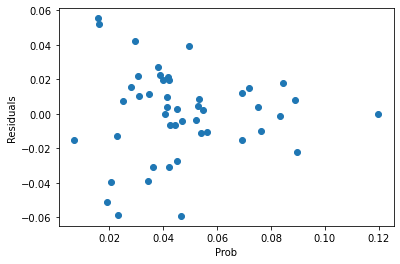

In [63]:
X=data[['Po1','Po2','Pop','GDP','Prob']].values
reg.fit(data[['Po1','Po2','Pop','GDP','Prob']],data['y'])
y_pred = reg.predict(data[['Po1','Po2','Pop','GDP','Prob']])
error = data['y']-y_pred


plt.scatter(data['Prob'],error)
plt.xlabel('Prob')
plt.ylabel(('Residuals'))

(10) Do residuals of M1 and M2 follow the normal distribution based on the Jarque–Bera test? (significance level is 0.05). 

In [64]:
#M1
X=data[['Po1','Po2','Pop','GDP','Prob']].values
reg.fit(data[['Po1','Po2','Pop','GDP','Prob']],data['y'])
y_pred = reg.predict(data[['Po1','Po2','Pop','GDP','Prob']])
error = data['y']-y_pred

S=skew(error)

C=kurtosis(error, fisher=False)
n, p = X.shape
JB = (n-p)/6*(S**2+(C-3)**2/4)
pvalue=1-chi2.cdf(JB, df=2)
print(pvalue)

#M2
X=data[['Po1','Pop','GDP','Prob']].values
reg.fit(data[['Po1','Pop','GDP','Prob']],data['y'])
y_pred = reg.predict(data[['Po1','Pop','GDP','Prob']])
error = data['y']-y_pred

S=skew(error)

C=kurtosis(error, fisher=False)
n, p = X.shape
JB = (n-p)/6*(S**2+(C-3)**2/4)
pvalue=1-chi2.cdf(JB, df=2)
print(pvalue)

0.7079936135930361
0.42260579692838063


(11) Do residuals of M1 and M2 satisfy homoskedasticty based on the Breusch–Pagan test? (significance level is 0.05) 

In [65]:
#M1
X=data[['Po1','Po2','Pop','GDP','Prob']].values
reg.fit(X, error**2)
e2_pred = reg.predict(X)
error_e2=error**2-e2_pred

SSE=sum(error_e2**2)
SSR=sum((e2_pred-np.mean(error**2))**2)

n,p = X.shape
MSE=SSE/(n-p-1)
MSR=SSR/p

f0 = MSR/MSE
pvalue=1-f.cdf(f0,p,n-p-1)
print(pvalue)
#M2
X=data[['Po1','Pop','GDP','Prob']].values
reg.fit(X, error**2)
e2_pred = reg.predict(X)
error_e2=error**2-e2_pred

SSE=sum(error_e2**2)
SSR=sum((e2_pred-np.mean(error**2))**2)

n,p = X.shape
MSE=SSE/(n-p-1)
MSR=SSR/p

f0 = MSR/MSE
pvalue=1-f.cdf(f0,p,n-p-1)
print(pvalue)

8.278723675925193e-06
2.7261145944201814e-05


# 2. Logistic regression

Using the MAGIC Gamma Telescope data set, build a classifier through logistic regression.

The included variabes in this dataset are as follows. 
1. fLength: continuous # major axis of ellipse [mm] 
2. fWidth: continuous # minor axis of ellipse [mm] 
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot] 
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio] 
5. fConc1: continuous # ratio of highest pixel over fSize [ratio] 
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm] 
7. fM3Long: continuous # 3rd root of third moment along major axis [mm] 
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm] 
9. fAlpha: continuous # angle of major axis with vector to origin [deg] 
10. fDist: continuous # distance from origin to center of ellipse [mm] 
11. class: g,h # gamma (signal), hadron (background)
    - g is treated as class 1 while h is treated as class 0

In [66]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

# data load
magic=pd.read_csv('https://drive.google.com/uc?export=download&id=1AoCh22pmLHhdQtYdYUAJJqOCwF9obgVO', sep='\t')

X=magic[magic.columns[:-1]].values
y=magic['class'].values

# data partition
trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.2,random_state=10, stratify=y)
# train_test_split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(1) Using MAGIC Gamma Telescope data set, calculate accuracy with varying cutoff for the final decision. cutoff ∈{0.1,0.15,0.2,0.25,…,0.95}. Draw a line plot (x=cutoff, y=accuracy). For this problem, the model is trained using trnX and accuracy is calculated using valX.

(0.0, 1.0, 0.7, 0.85)

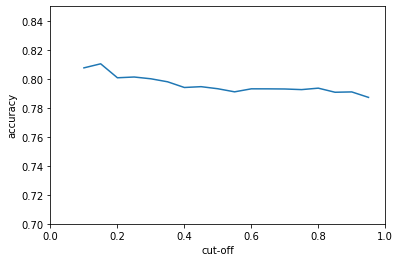

In [68]:
x=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
yList=[]
clf = LogisticRegression(max_iter=300)
trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.1,random_state=10, stratify=y)
clf.fit(trnX,trnY)
yList.append(clf.score(valX,valY))

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.15,random_state=10, stratify=y)
clf.fit(trnX,trnY)
yList.append(clf.score(valX,valY))

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.2,random_state=10, stratify=y)
clf.fit(trnX,trnY)
yList.append(clf.score(valX,valY))

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.25,random_state=10, stratify=y)
clf.fit(trnX,trnY)
yList.append(clf.score(valX,valY))

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.3,random_state=10, stratify=y)
clf.fit(trnX,trnY)
yList.append(clf.score(valX,valY))

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.35,random_state=10, stratify=y)
clf.fit(trnX,trnY)
yList.append(clf.score(valX,valY))

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.4,random_state=10, stratify=y)
clf.fit(trnX,trnY)
yList.append(clf.score(valX,valY))

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.45,random_state=10, stratify=y)
clf.fit(trnX,trnY)
yList.append(clf.score(valX,valY))

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.5,random_state=10, stratify=y)
clf.fit(trnX,trnY)
yList.append(clf.score(valX,valY))

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.55,random_state=10, stratify=y)
clf.fit(trnX,trnY)
yList.append(clf.score(valX,valY))

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.6,random_state=10, stratify=y)
clf.fit(trnX,trnY)
yList.append(clf.score(valX,valY))

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.65,random_state=10, stratify=y)
clf.fit(trnX,trnY)
yList.append(clf.score(valX,valY))

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.7,random_state=10, stratify=y)
clf.fit(trnX,trnY)
yList.append(clf.score(valX,valY))

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.75,random_state=10, stratify=y)
clf.fit(trnX,trnY)
yList.append(clf.score(valX,valY))

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.8,random_state=10, stratify=y)
clf.fit(trnX,trnY)
yList.append(clf.score(valX,valY))

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.85,random_state=10, stratify=y)
clf.fit(trnX,trnY)
yList.append(clf.score(valX,valY))

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.9,random_state=10, stratify=y)
clf.fit(trnX,trnY)
yList.append(clf.score(valX,valY))

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.95,random_state=10, stratify=y)
clf.fit(trnX,trnY)
yList.append(clf.score(valX,valY))

plt.plot(x,yList)
plt.xlabel("cut-off")
plt.ylabel("accuracy")
plt.axis([0,1,0.7,0.85])